# Simple demonstration with the Iris dataset
To best illustrate how this package can serve as an interface to further manipulate the nodes and edges of the plotted tree diagram, we will consider the well-known Iris dataset and use scikit-learn's `DecisionTreeClassifier` to train a classification tree.

As usual (see [documentation from scikit-learn](https://scikit-learn.org/stable/modules/tree.html#classification)), we will first load the dataset then construct the decision tree.

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

One can choose to directly plot the tree.

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, '

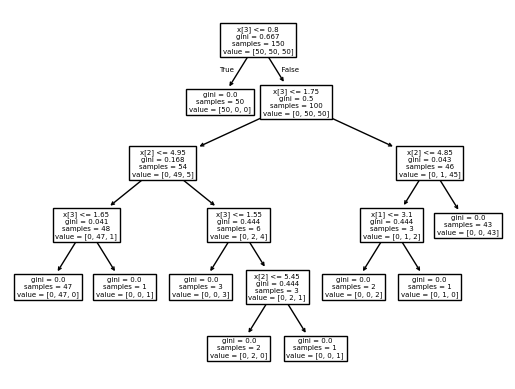

In [2]:
tree.plot_tree(clf)

Scikit-learn has also provided several interfaces to carry out some surface-level modifications, for example:

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.67\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.17\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.04\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.44\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2]

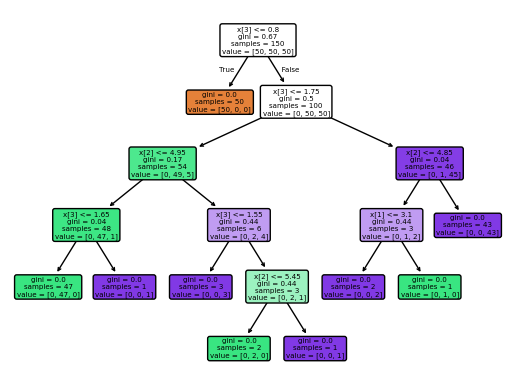

In [3]:
tree.plot_tree(clf, filled=True, rounded=True, precision=2)

However, to make nuanced changes, one must directly modify the DOT script generated by scikit-learn, which is used to render the tree plot using a [Graphviz](https://graphviz.org/) backend.

In [4]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")

'iris.pdf'

Upon running the code above, a DOT file `iris` and PDF with the tree plot `iris.pdf` should be generated and saved in the folder.

The variable `dot_data` is simplying a Python string, which is passed into the function `graphviz.Source()` to render the tree plot.

In [5]:
dot_data

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="x[3] <= 0.8\\ngini = 0.667\\nsamples = 150\\nvalue = [50, 50, 50]"] ;\n1 [label="gini = 0.0\\nsamples = 50\\nvalue = [50, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="x[3] <= 1.75\\ngini = 0.5\\nsamples = 100\\nvalue = [0, 50, 50]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="x[2] <= 4.95\\ngini = 0.168\\nsamples = 54\\nvalue = [0, 49, 5]"] ;\n2 -> 3 ;\n4 [label="x[3] <= 1.65\\ngini = 0.041\\nsamples = 48\\nvalue = [0, 47, 1]"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 47\\nvalue = [0, 47, 0]"] ;\n4 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 1]"] ;\n4 -> 6 ;\n7 [label="x[3] <= 1.55\\ngini = 0.444\\nsamples = 6\\nvalue = [0, 2, 4]"] ;\n3 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 3\\nvalue = [0, 0, 3]"] ;\n7 -> 8 ;\n9 [label="x[2] <= 5.45\\ngini = 0.444\\nsamples = 3\\nvalue = [0, 2, 1]"] ;\n7 -> 9

Hence, one has to simply modify the `dot_data` string appropriately, and pass it to Graphviz to generate a tree with desired changes.